In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [2]:
os.chdir("D:\\Git\\RegresionLogistica\\Archivos\\Titanic\\")
os.listdir()

['gender_submission.csv', 'test.csv', 'train.csv']

In [94]:
db_train=pd.read_csv('train.csv',sep=',')
db_test=pd.read_csv('test.csv',sep=',')
db_y_test=pd.read_csv('gender_submission.csv',sep=',')

In [95]:
db_train.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [97]:
db_train.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)
db_test.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

KeyError: "['Name' 'Ticket' 'Cabin'] not found in axis"

In [98]:
db_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [83]:
db_train.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.086420,0.722783
std,257.353842,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,0.281141,0.447876
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000


In [84]:
db_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<AxesSubplot:>

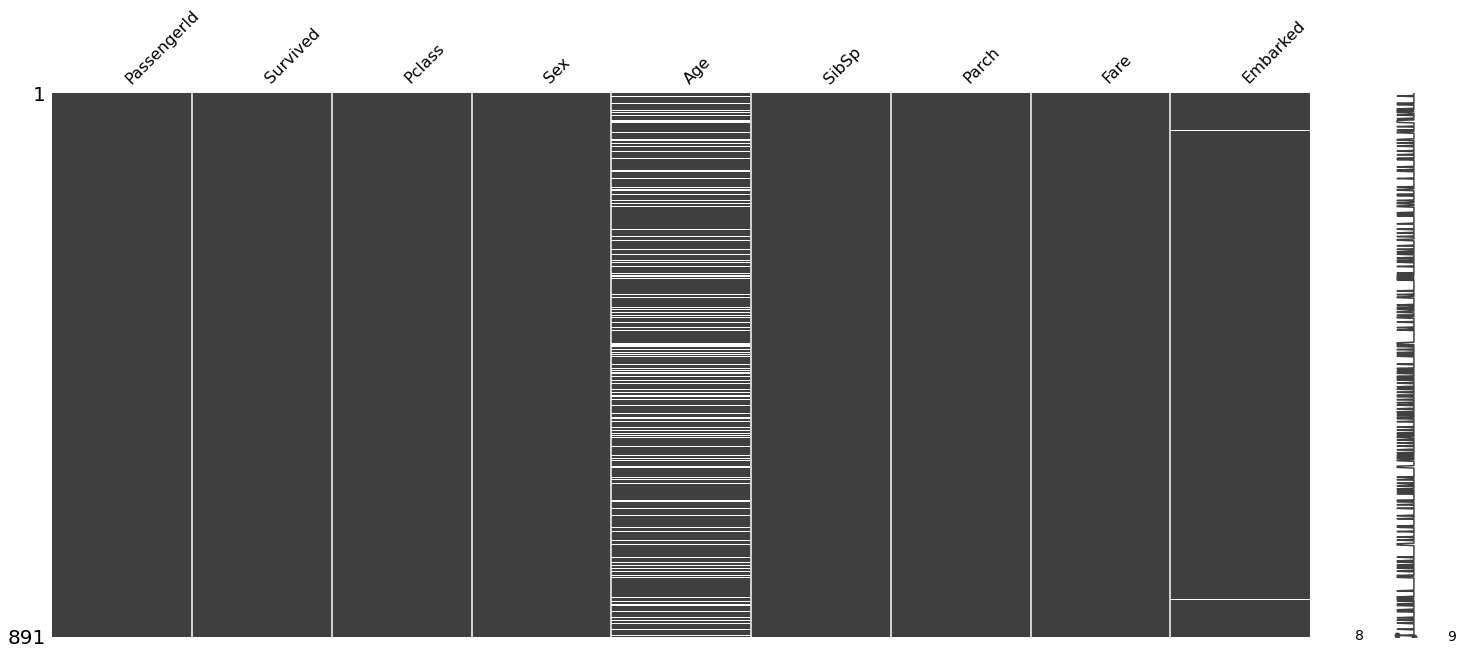

In [99]:
import missingno as msno
%matplotlib inline
msno.matrix(db_train)

<AxesSubplot:>

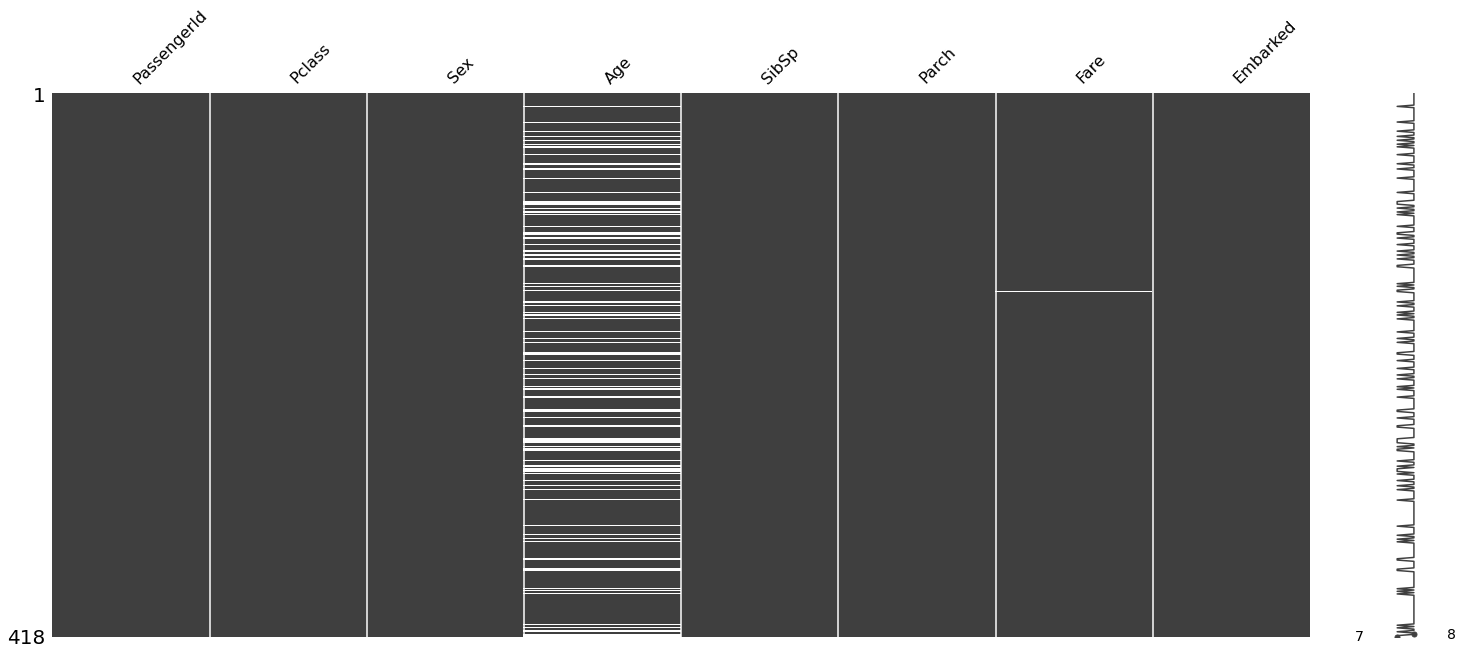

In [86]:
%matplotlib inline
msno.matrix(db_test)

In [11]:
db_train.shape[0]

891

In [12]:
db_train.isnull().sum()/db_train.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Fare           0.000000
Embarked       0.002245
dtype: float64

### analisis variables numericas

C:\Users\DIEGO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

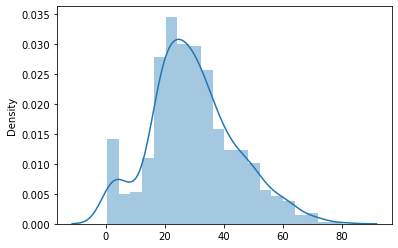

In [13]:
sns.distplot(x=db_train.Age)

C:\Users\DIEGO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

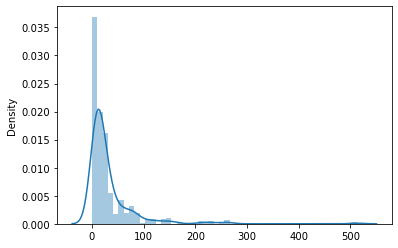

In [14]:
sns.distplot(x=db_train.Fare)

C:\Users\DIEGO\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

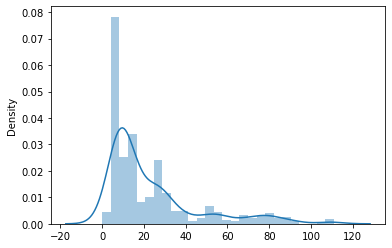

In [15]:
removed_outliers = db_train.Fare[db_train.Fare.between(0, db_train.Fare.quantile(.95))==True]
sns.distplot(x=removed_outliers)

### analisis variables categoricas

0    549
1    342
Name: Survived, dtype: int64


<AxesSubplot:xlabel='Survived', ylabel='count'>

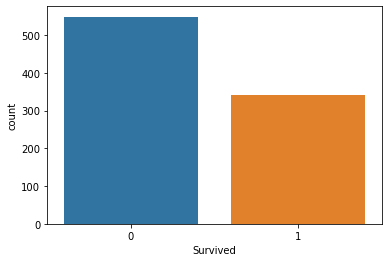

In [16]:
print(db_train['Survived'].value_counts())
sns.countplot(x='Survived',data=db_train)

male      577
female    314
Name: Sex, dtype: int64


<AxesSubplot:xlabel='Sex', ylabel='count'>

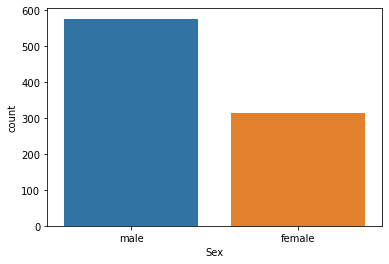

In [17]:
print(db_train['Sex'].value_counts())
sns.countplot(x='Sex',data=db_train)

3    491
1    216
2    184
Name: Pclass, dtype: int64


<AxesSubplot:xlabel='Pclass', ylabel='count'>

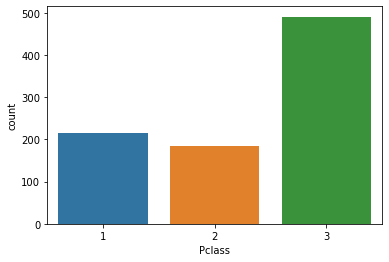

In [18]:
print(db_train['Pclass'].value_counts())
sns.countplot(x='Pclass',data=db_train)

S    644
C    168
Q     77
Name: Embarked, dtype: int64


<AxesSubplot:xlabel='Embarked', ylabel='count'>

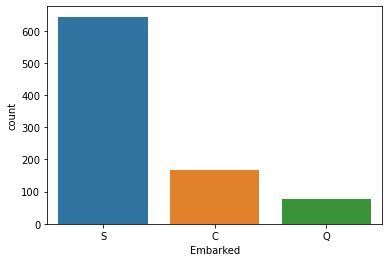

In [19]:
print(db_train['Embarked'].value_counts())
sns.countplot(x='Embarked',data=db_train)

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


<AxesSubplot:xlabel='SibSp', ylabel='count'>

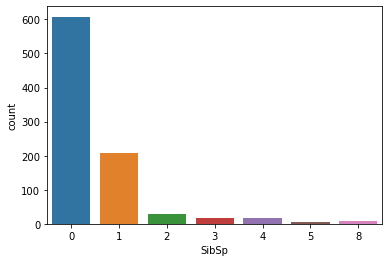

In [20]:
print(db_train['SibSp'].value_counts())
sns.countplot(x='SibSp',data=db_train)

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


<AxesSubplot:xlabel='Parch', ylabel='count'>

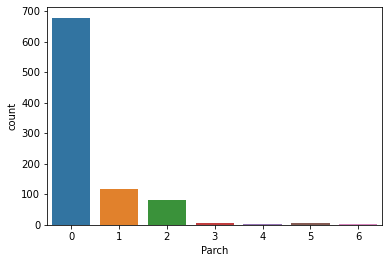

In [21]:
print(db_train['Parch'].value_counts())
sns.countplot(x='Parch',data=db_train)

<AxesSubplot:xlabel='Sex', ylabel='count'>

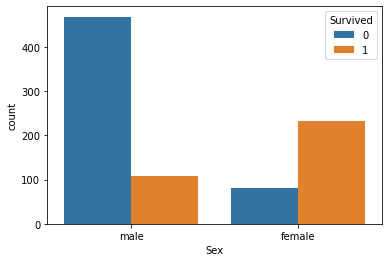

In [22]:
sns.countplot(x="Sex",data=db_train,hue="Survived")

<AxesSubplot:xlabel='Pclass', ylabel='count'>

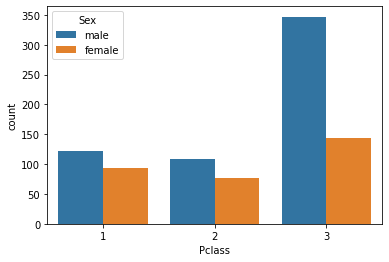

In [23]:
sns.countplot(x="Pclass",data=db_train,hue="Sex")

<AxesSubplot:xlabel='Pclass', ylabel='count'>

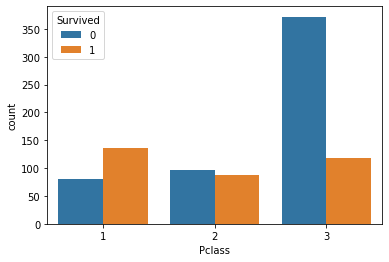

In [24]:
sns.countplot(x="Pclass",data=db_train,hue="Survived")

### analisis variables numericas - categoricas

<AxesSubplot:xlabel='Survived', ylabel='Age'>

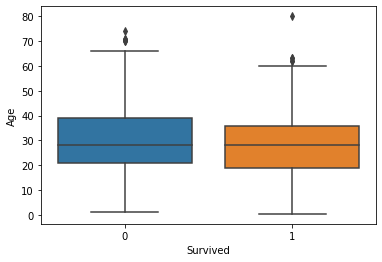

In [25]:
sns.boxplot(y=db_train.Age,x=db_train.Survived)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

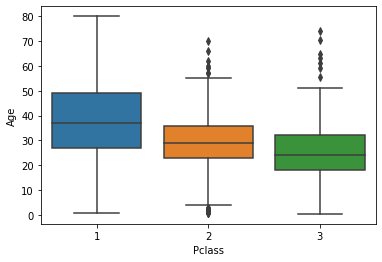

In [26]:
sns.boxplot(y=db_train.Age,x=db_train.Pclass)

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

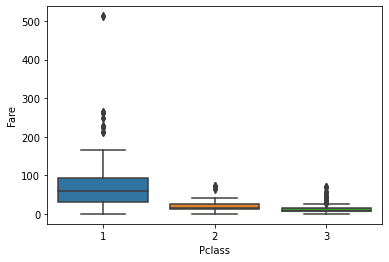

In [27]:
sns.boxplot(y=db_train.Fare,x=db_train.Pclass)

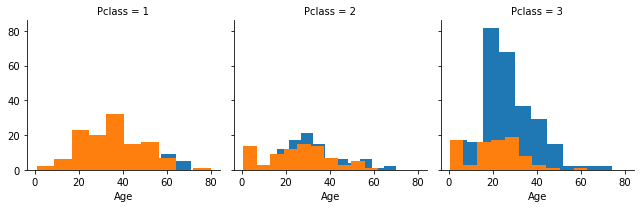

In [28]:
g = sns.FacetGrid(db_train, col="Pclass",hue="Survived")
g.map(plt.hist,"Age")

### Decision Tree

In [100]:
db_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [115]:
#Train
db_train['Sex']=np.where(db_train['Sex'].str.contains('female'),1,0)
db_train_dummy=pd.get_dummies(db_train.Embarked,drop_first=True)
db_train=pd.concat([db_train,db_train_dummy],axis=1)

AttributeError: Can only use .str accessor with string values!

In [116]:
#Test
db_test['Sex']=np.where(db_test['Sex'].str.contains('female'),1,0)
db_test_dummy=pd.get_dummies(db_test.Embarked,drop_first=True)
db_test=pd.concat([db_test,db_test_dummy],axis=1)

In [120]:
db_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Q,S
0,892,3,0,34.5,0,0,7.8292,Q,1,0
1,893,3,1,47.0,1,0,7.0000,S,0,1
2,894,2,0,62.0,0,0,9.6875,Q,1,0
3,895,3,0,27.0,0,0,8.6625,S,0,1
4,896,3,1,22.0,1,1,12.2875,S,0,1
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,NaN,0,0,8.0500,S,0,1
414,1306,1,1,39.0,0,0,108.9000,C,0,0
415,1307,3,0,38.5,0,0,7.2500,S,0,1
416,1308,3,0,NaN,0,0,8.0500,S,0,1


In [102]:
from sklearn.neighbors._base import _check_weights

In [103]:
db_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,S
414,1306,1,female,39.0,0,0,108.9000,C
415,1307,3,male,38.5,0,0,7.2500,S
416,1308,3,male,NaN,0,0,8.0500,S


In [121]:
#TRAIN
X_train,y_train=db_train.drop(['Survived','PassengerId','Embarked'],axis=1),db_train.Survived
#TEST
X_test,y_test=db_test.drop(['PassengerId','Embarked'],axis=1),db_y_test.Survived

In [122]:
db_y_test

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [125]:
#Train
from sklearn.impute import SimpleImputer
# Missing values is represented using NaN and hence specified. If it 
# is empty field, missing values will be specified as ''
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
X_train.Age = imputer.fit_transform(X_train['Age'].values.reshape(-1,1))[:,0]


In [126]:
#Test
from sklearn.impute import SimpleImputer
# Missing values is represented using NaN and hence specified. If it 
# is empty field, missing values will be specified as ''
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')
X_test.Age = imputer.fit_transform(X_test['Age'].values.reshape(-1,1))[:,0]

In [142]:
#db_test.Fare.value_counts().re
X_test["Fare"]=X_test["Fare"].replace(np.nan,35)

In [127]:
X_train.shape

(891, 8)

In [128]:
y_train.shape

(891,)

In [129]:
X_train.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208,0.086420,0.722783
std,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.281141,0.447876
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200,0.000000,1.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,0.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000


<AxesSubplot:>

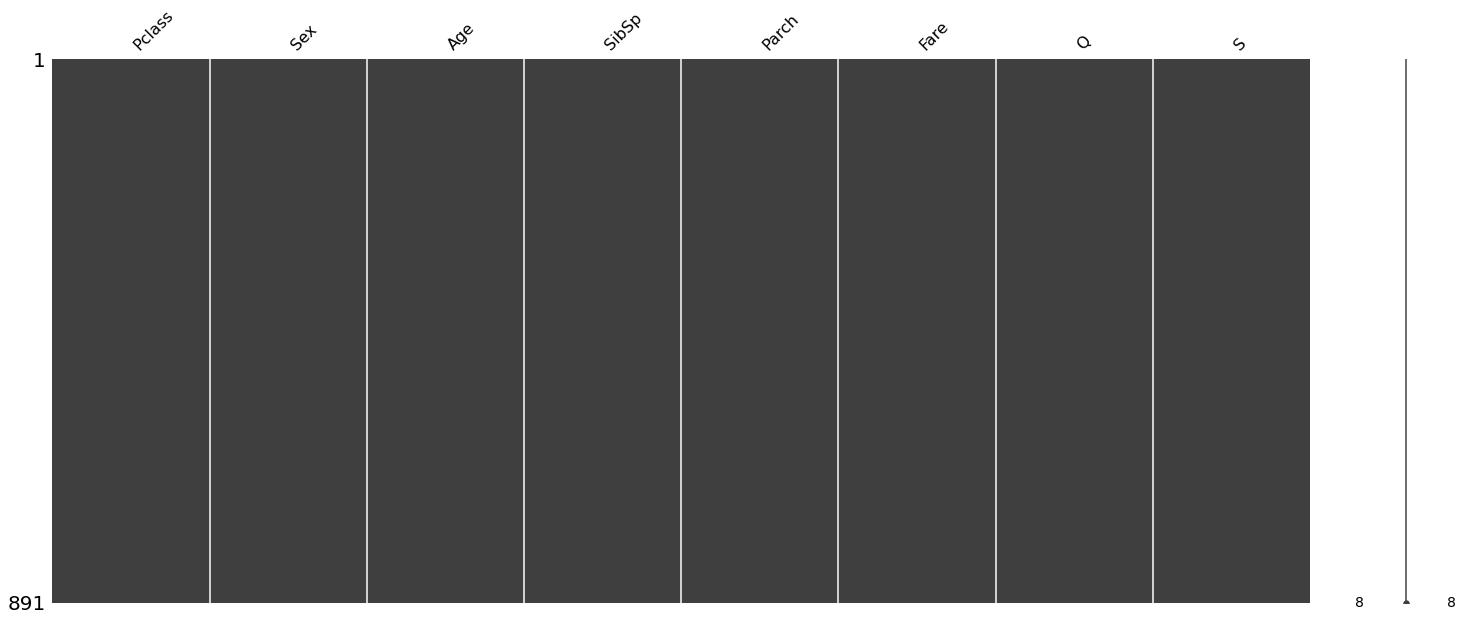

In [130]:
import missingno as msno
%matplotlib inline
msno.matrix(X_train)

<AxesSubplot:>

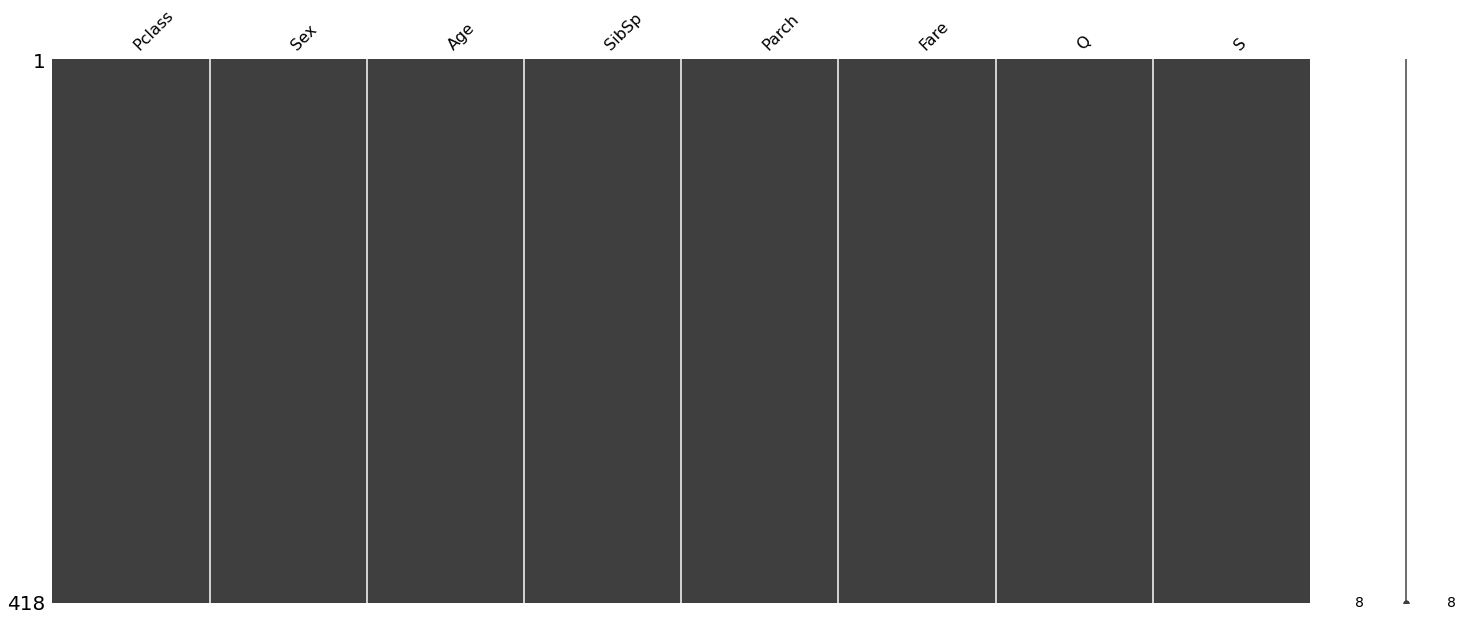

In [143]:
import missingno as msno
%matplotlib inline
msno.matrix(X_test)

In [132]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Q,S
0,3,0,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,0,0
2,3,1,26.0,0,0,7.9250,0,1
3,1,1,35.0,1,0,53.1000,0,1
4,3,0,35.0,0,0,8.0500,0,1


In [76]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [154]:
clf=DecisionTreeClassifier()
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [146]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_test_hat,labels)
sns.heatmap(cm,
            annot=True,
            fmt='d',
            xticklabels=labels,
            yticklabels=labels,
            cmap='Greens')
plt.ylabel('Predicted')
plt.xlabel('Actual');

NameError: name 'labels' is not defined

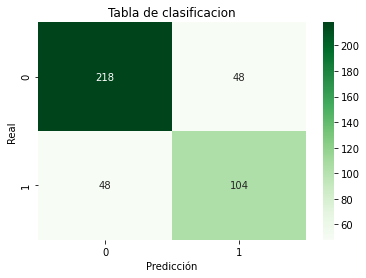

In [155]:
# matriz de confusión
import seaborn as sns
from sklearn.metrics import confusion_matrix
labels = ['0','1']
cm = confusion_matrix(y_test,y_pred)
plt.title('Tabla de clasificacion')
sns.heatmap(cm,
            annot=True,
            fmt='d',
            xticklabels=labels,
            yticklabels=labels,
            cmap='Greens')
plt.ylabel('Real')
plt.xlabel('Predicción');

In [156]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       266
           1       0.68      0.68      0.68       152

    accuracy                           0.77       418
   macro avg       0.75      0.75      0.75       418
weighted avg       0.77      0.77      0.77       418

